In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
data = pd.read_csv('CandidateSummaryAction1.csv')

In [3]:
data.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_str1,can_str2,can_cit,...,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,deb_owe_by_com,deb_owe_to_com,cov_sta_dat,cov_end_dat,winner,votes
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,2237 PICKENS RD,NaN,AUGUSTA,...,"$60,109.57","$175,613.35","$1,074,949.50","$907,156.21","$1,125,000.00",NaN,1/1/2015,10/19/2016,Y,158708.0
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PO BOX 6578,NaN,PHILADELPHIA,...,NaN,"$105,687.23","$1,406,719.06","$1,298,831.83",NaN,NaN,11/2/2015,10/19/2016,Y,310770.0
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,3817 VICKERS LAKE DRIVE,NaN,JACKSONVILLE,...,NaN,"$35,645.09","$650,855.38","$656,210.29","$60,000.00",NaN,4/1/2016,10/19/2016,Y,286018.0
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,409 2ND ST W,NaN,WHITEFISH,...,"$83,815.78","$399,122.61","$4,938,943.74","$5,055,942.15",NaN,NaN,1/1/2015,10/19/2016,Y,280476.0
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,"409 13TH ST, 17TH FL",NaN,OAKLAND,...,"$83,690.60","$181,338.23","$1,197,676.61","$949,488.98","$4,401.75",NaN,1/1/2015,10/19/2016,Y,277390.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   can_id                 1814 non-null   object 
 1   can_nam                1814 non-null   object 
 2   can_off                1814 non-null   object 
 3   can_off_sta            1814 non-null   object 
 4   can_off_dis            1812 non-null   float64
 5   can_par_aff            1813 non-null   object 
 6   can_inc_cha_ope_sea    1812 non-null   object 
 7   can_str1               1789 non-null   object 
 8   can_str2               122 non-null    object 
 9   can_cit                1813 non-null   object 
 10  can_sta                1806 non-null   object 
 11  can_zip                1789 non-null   float64
 12  ind_ite_con            1570 non-null   object 
 13  ind_uni_con            1538 non-null   object 
 14  ind_con                1616 non-null   object 
 15  par_

In [6]:
summary = pd.DataFrame({'null_values': data.isnull().sum(), 'datatypes': data.dtypes})
summary = summary.reset_index()

In [7]:
summary

,index,null_values,datatypes
0,can_id,0,object
1,can_nam,0,object
2,can_off,0,object
3,can_off_sta,0,object
4,can_off_dis,2,float64
5,can_par_aff,1,object
6,can_inc_cha_ope_sea,2,object
7,can_str1,25,object
8,can_str2,1692,object
9,can_cit,1,object


In [8]:
data_info = pd.read_html('https://web.archive.org/web/20170118212350/http://www.fec.gov/finance/disclosure/metadata/metadataforcandidatesummary.shtml')

In [9]:
data_dic = data_info[2]
data_dic.columns = data_dic.iloc[0,:]


In [10]:
data_info[2]

,Tag,Field Name,Data Type,Description,Range,Explanation
0,Tag,Field Name,Data Type,Description,Range,Explanation
1,lin_ima,Link to list of reports for the committee,URI,List of all disclosure filings for this committee,NaN,Link to list of filings made directly by the c...
2,can_id,Candidate Id,Character,NaN,9 characters,First character indicates office sought - H=Ho...
3,can_nam,Candidate Name,Character,Name of candidate,Max 90 characters,NaN
4,can_off,Candidate Office,Text,office abbreviation,1 character,P=President; S=Senate; H=House
5,can_off_sta,Candidate Office State,Character,Postal abbreviation for state,2 characters,NaN
6,can_off_dis,Candidate Office District,Number,District number for House candidates,2 digits,NaN
7,can_par_aff,Candidate Party Affiliation,Character,Party abbreviation,3 characters,Dem=Democrat Rep=Republican full list of Par...
8,can_inc_cha_ope_sea,Candidate Incumbent Challenger Open Seat,Character,Incumbent or challenger or open seat indicator,10 characters,I=incumbent; C=challenger; O=open seat (where ...
9,can_str1,Candidate Street 1,Text,Street address,NaN,Provided by the candidate on a statement of ca...


In [11]:
data_dic.columns

Index(['Tag', 'Field Name', 'Data Type', 'Description', 'Range',
       'Explanation'],
      dtype='object', name=0)

In [12]:
data_dic = data_dic.drop([0, 1], axis = 0)
data_dic = data_dic.reset_index(drop=True)
data_dic.head()

,Tag,Field Name,Data Type,Description,Range,Explanation
0,can_id,Candidate Id,Character,NaN,9 characters,First character indicates office sought - H=Ho...
1,can_nam,Candidate Name,Character,Name of candidate,Max 90 characters,NaN
2,can_off,Candidate Office,Text,office abbreviation,1 character,P=President; S=Senate; H=House
3,can_off_sta,Candidate Office State,Character,Postal abbreviation for state,2 characters,NaN
4,can_off_dis,Candidate Office District,Number,District number for House candidates,2 digits,NaN


In [13]:
data_dic.to_csv('data_dic.csv')

In [14]:
frame = [['winner', 0, 'object',0,0,0], ['votes', 0,'float',0,0,0]]

In [15]:
frame

[['winner', 0, 'object', 0, 0, 0], ['votes', 0, 'float', 0, 0, 0]]

In [16]:
winners_votes = pd.DataFrame(frame, columns=data_dic.columns, index = [49, 50])


In [17]:
winners_votes

,Tag,Field Name,Data Type,Description,Range,Explanation
49,winner,0,object,0,0,0
50,votes,0,float,0,0,0


In [18]:
data_dic = pd.concat([data_dic, winners_votes], axis = 0)
data_dic.head()

,Tag,Field Name,Data Type,Description,Range,Explanation
0,can_id,Candidate Id,Character,NaN,9 characters,First character indicates office sought - H=Ho...
1,can_nam,Candidate Name,Character,Name of candidate,Max 90 characters,NaN
2,can_off,Candidate Office,Text,office abbreviation,1 character,P=President; S=Senate; H=House
3,can_off_sta,Candidate Office State,Character,Postal abbreviation for state,2 characters,NaN
4,can_off_dis,Candidate Office District,Number,District number for House candidates,2 digits,NaN


In [19]:
summary['correct_dtypes'] = data_dic['Data Type']
summary

,index,null_values,datatypes,correct_dtypes
0,can_id,0,object,Character
1,can_nam,0,object,Character
2,can_off,0,object,Text
3,can_off_sta,0,object,Character
4,can_off_dis,2,float64,Number
5,can_par_aff,1,object,Character
6,can_inc_cha_ope_sea,2,object,Character
7,can_str1,25,object,Text
8,can_str2,1692,object,Text
9,can_cit,1,object,Text


In [20]:
curr_col = summary[summary['correct_dtypes']=='Currency']['index'].to_list()

In [21]:
import re
#def split_join(col):
 #   if type(col) == str:
  #      l = []
   #     for string in re.split('', col):
    #        if string.isdigit():
     #           pass
      #      else:
       #         l.append(string)
        #    
        #l.remove('.')
      #  #merge all element of with the empty string after removing duplicates
       # split_criterion = '[' + ''.join(list(set(l))) + ']'
        #after getting all non-digit element($ and ,) we now use it to split our data and join them together
        #output = ''.join(re.split(split_criterion, col))
        #return float(output)
    #else:
     #   return col
#for col in curr_col:
#    data[col] = data[col].apply(split_join)
#data


,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_str1,can_str2,can_cit,...,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,deb_owe_by_com,deb_owe_to_com,cov_sta_dat,cov_end_dat,winner,votes
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,2237 PICKENS RD,NaN,AUGUSTA,...,60109.57,175613.35,1074949.50,907156.21,1125000.00,NaN,1/1/2015,10/19/2016,Y,158708.0
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PO BOX 6578,NaN,PHILADELPHIA,...,NaN,105687.23,1406719.06,1298831.83,NaN,NaN,11/2/2015,10/19/2016,Y,310770.0
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,3817 VICKERS LAKE DRIVE,NaN,JACKSONVILLE,...,NaN,35645.09,650855.38,656210.29,60000.00,NaN,4/1/2016,10/19/2016,Y,286018.0
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,409 2ND ST W,NaN,WHITEFISH,...,83815.78,399122.61,4938943.74,5055942.15,NaN,NaN,1/1/2015,10/19/2016,Y,280476.0
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,"409 13TH ST, 17TH FL",NaN,OAKLAND,...,83690.60,181338.23,1197676.61,949488.98,4401.75,NaN,1/1/2015,10/19/2016,Y,277390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,P60005931,"BUTTOCKS, SYDNEYS VOLUPTOUS",P,US,0.0,IND,OPEN,143 HIGHLAND AVENUE,NaN,BUFFALO,...,5000.00,5000.00,NaN,NaN,NaN,NaN,3/3/2015,3/31/2015,NaN,NaN
1810,S6CA00568,"MOLNAR, ROBERT",S,CA,0.0,REP,OPEN,PO BOX 321231,NaN,LOS GATOS,...,1000.00,NaN,1000.00,1000.00,NaN,NaN,1/1/2015,3/31/2015,NaN,NaN
1811,S6MD03524,"HOLMES, GREGORY",S,MD,0.0,REP,OPEN,13601 MACDERNUT CT,NaN,UPPER MARLBORO,...,NaN,NaN,NaN,NaN,NaN,NaN,8/29/2017,2/1/2015,NaN,NaN
1812,H6AS00031,"HUNKIN-FINAU, VAITINASA SALU",H,AS,NaN,DEM,NaN,PO BOX 252 VAILOAUTA,NaN,PAGO PAGO,...,1058.44,4561.00,41670.00,38167.44,NaN,NaN,7/1/2016,10/19/2016,NaN,NaN


In [22]:
#def get_high_correlations(df, correlation = 0.5):
    # it gets the pairs with the highest correlation that are above 0.5
    # ##########
    # gets the correlation of each column with itself and others
 #   matrix = df.corr()
    #returns a transpose of the corr matrix with values above the diagonal only
  #  matrix = matrix * np.tri(*matrix.values.shape, k=-1).T
    # stack the matrix
   # matrix = matrix.stack()
    #gets the correlation from the highest to the lowest and reindex 
    #matrix = matrix.reindex(matrix.abs().sort_values(ascending = False).index).reset_index()
    
    # assign names to columns
 #   matrix.columns = ['var1', 'var2', 'correlation']
    # drop values that are equal to zero
  #  matrix= matrix[matrix['correlation'] != 0]
    #drop values greater than 0.5
   # matrix = matrix[matrix['correlation'] >= correlation]
    #return matrix

In [23]:
patrix = data.corr()
patrix = patrix *np.tri(*patrix.values.shape, k=-1).T
patrix = patrix.stack()
patrix = patrix.reindex(patrix.abs().sort_values(ascending=False).index).reset_index()

patrix.columns = ['var1', 'var2', 'correlation']
patrix = patrix[patrix['correlation']!= 0 ]
patrix = patrix[patrix['correlation']>= 0.5]
patrix

,var1,var2,correlation
3,tot_loa,exe_leg_acc_dis,1.000000
4,fun_dis,can_loa_rep,1.000000
5,exe_leg_acc_dis,net_con,1.000000
6,oth_loa,tra_to_oth_aut_com,1.000000
8,oth_loa,fun_dis,1.000000
...,...,...,...
216,can_con,exe_leg_acc_dis,0.526834
217,ope_exp,par_com_ref,0.523345
218,tot_con,tra_to_oth_aut_com,0.522111
219,ind_ref,cas_on_han_clo_of_per,0.501874


In [24]:
from collections import Counter

In [25]:
#def check_highest_corr(df, num_null = 200):
 #   high_correlations = get_high_correlations(df)
  #  high_corr_list1 = high_correlations['var1'].to_list()
   # high_corr_list2 = high_correlations['var2'].to_list()
    
    #high_corr_list = high_corr_list1 + high_corr_list2
    #count the columns with the highest number of occurence
#    dic1 = Counter(high_corr_list)
    #print keys with values greater than 1
 #   high_dic_keys = [ key for key, value in dic1.items() if value >= 1]
    # get columns with not more than 200 missing values with higher correlation
  #  summary_currency = summary[summary['correct_dtypes']=='Currency']
   # summary_currency = summary_currency.sort_values('null_values')
    #summmary_currency = summary_currency[summary_currency['null_values'] <= num_null]
    #low_null_values = summary_currency['index'].to_list()
    
    #return list(set(high_dic_keys).intersection(set(low_null_values)))

In [26]:
hi_corr_l1 = patrix['var1'].to_list()
hi_corr_l2 = patrix['var2'].to_list()
hi_corr_list = hi_corr_l1 + hi_corr_l2

dic2 = Counter(hi_corr_list)

hi_dic2_keys = [ key for key, value in dic2.items() if value >= 1]
sum_cur = summary[summary['correct_dtypes']=='Currency']
sum_cur = sum_cur.sort_values('null_values')
sum_cur = sum_cur[sum_cur['null_values'] <= 200]

lw_null_values = sum_cur['index'].to_list()

rtn = list(set(hi_dic2_keys).intersection(set(lw_null_values)))
rtn

['net_con',
 'tot_con',
 'tot_dis',
 'tot_rec',
 'net_ope_exp',
 'ope_exp',
 'ind_con']

In [27]:
retained_list = check_highest_corr(data, 200)

In [28]:
len(rtn)

7

In [29]:
df_1 = data.drop(columns = curr_col)
df_2 = data[rtn]
df_2

data1 = pd.concat([df_1, df_2], axis =1)
columns1 = list(data1.columns)
columns1.remove('winner')
columns1.remove('votes')
columns1.extend(['votes','winner'])
data1 = data1.loc[:,columns1]
data1.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_str1,can_str2,can_cit,...,cov_end_dat,net_con,tot_con,tot_dis,tot_rec,net_ope_exp,ope_exp,ind_con,votes,winner
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,2237 PICKENS RD,NaN,AUGUSTA,...,10/19/2016,1074949.50,1074949.50,978518.98,1094022.76,907156.21,908518.98,601274.50,158708.0,Y
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PO BOX 6578,NaN,PHILADELPHIA,...,10/19/2016,1406719.06,1417545.22,1313583.69,1419270.92,1298831.83,1300557.53,1114711.02,310770.0,Y
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,3817 VICKERS LAKE DRIVE,NaN,JACKSONVILLE,...,10/19/2016,650855.38,650855.38,675642.76,711287.85,656210.29,656642.76,542105.38,286018.0,Y
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,409 2ND ST W,NaN,WHITEFISH,...,10/19/2016,4938943.74,4980915.41,5200630.00,5190887.78,5055942.15,5073110.33,4317331.58,280476.0,Y
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,"409 13TH ST, 17TH FL",NaN,OAKLAND,...,10/19/2016,1197676.61,1205863.61,1112163.94,1209811.57,949488.98,953436.94,897123.61,277390.0,Y


In [30]:
df1 = data.drop(columns = curr_col)
df2 = data[retained_list]

data_new = pd.concat([df1,df2], axis = 1)


columns = list(data_new.columns)
columns.remove('winner')
columns.remove('votes')

columns.extend(['votes','winner'])

data_new = data_new.loc[:, columns]

data_new.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_str1,can_str2,can_cit,...,oth_rec,tra_fro_oth_aut_com,tot_con,off_to_fun,ind_ite_con,can_con,exe_leg_acc_dis,oth_loa_rep,votes,winner
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,2237 PICKENS RD,NaN,AUGUSTA,...,NaN,17710.49,1074949.50,NaN,554305.00,NaN,NaN,NaN,158708.0,Y
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PO BOX 6578,NaN,PHILADELPHIA,...,NaN,NaN,1417545.22,NaN,1042280.38,NaN,NaN,NaN,310770.0,Y
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,3817 VICKERS LAKE DRIVE,NaN,JACKSONVILLE,...,NaN,NaN,650855.38,NaN,529030.38,2700.0,NaN,NaN,286018.0,Y
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,409 2ND ST W,NaN,WHITEFISH,...,55910.19,136894.00,4980915.41,NaN,2479616.45,NaN,NaN,NaN,280476.0,Y
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,"409 13TH ST, 17TH FL",NaN,OAKLAND,...,NaN,NaN,1205863.61,NaN,746233.93,NaN,NaN,NaN,277390.0,Y


In [31]:
data1.columns

Index(['can_id', 'can_nam', 'can_off', 'can_off_sta', 'can_off_dis',
       'can_par_aff', 'can_inc_cha_ope_sea', 'can_str1', 'can_str2', 'can_cit',
       'can_sta', 'can_zip', 'cov_sta_dat', 'cov_end_dat', 'net_con',
       'tot_con', 'tot_dis', 'tot_rec', 'net_ope_exp', 'ope_exp', 'ind_con',
       'votes', 'winner'],
      dtype='object')

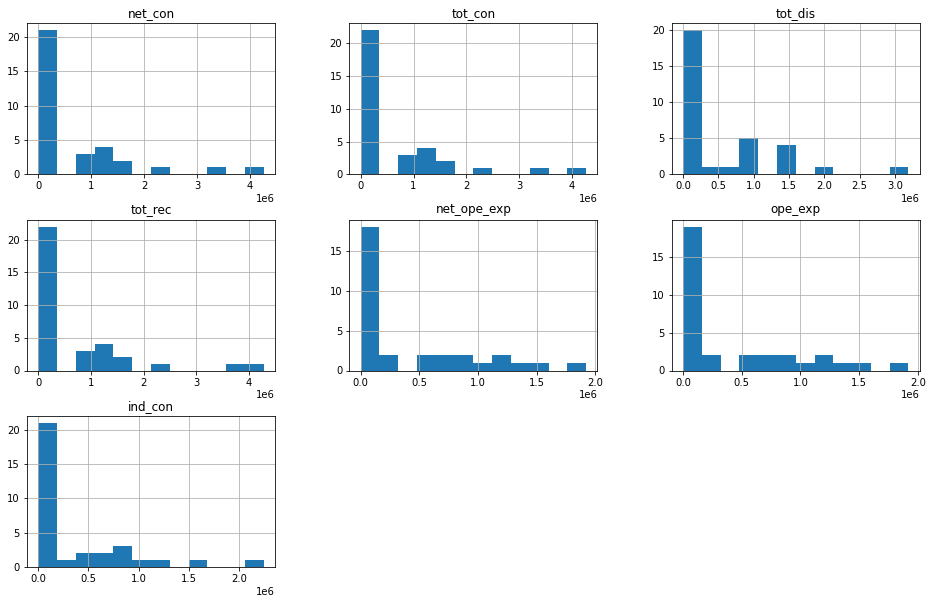

In [33]:
df_dem = data1[data1['can_off_dis'] == 12.0] 
df_dem[rtn].hist(figsize=(16, 10), bins = 12);

In [34]:
data1['winner'] = data1['winner'].fillna('N')

In [35]:
data1 = data1.drop(columns=['can_str1','can_str2','votes'])
data1.isnull().sum()

can_id                   0
can_nam                  0
can_off                  0
can_off_sta              0
can_off_dis              2
can_par_aff              1
can_inc_cha_ope_sea      2
can_cit                  1
can_sta                  8
can_zip                 25
cov_sta_dat              0
cov_end_dat              0
net_con                171
tot_con                119
tot_dis                 84
tot_rec                 93
net_ope_exp            149
ope_exp                 97
ind_con                198
winner                   0
dtype: int64

In [36]:
data1.shape

(1814, 20)

In [37]:
final_data = data1
final_data

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_cit,can_sta,can_zip,cov_sta_dat,cov_end_dat,net_con,tot_con,tot_dis,tot_rec,net_ope_exp,ope_exp,ind_con,winner
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,AUGUSTA,GA,30904.0,1/1/2015,10/19/2016,1074949.50,1074949.50,978518.98,1094022.76,907156.21,908518.98,601274.50,Y
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PHILADELPHIA,PA,19138.0,11/2/2015,10/19/2016,1406719.06,1417545.22,1313583.69,1419270.92,1298831.83,1300557.53,1114711.02,Y
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,JACKSONVILLE,FL,32224.0,4/1/2016,10/19/2016,650855.38,650855.38,675642.76,711287.85,656210.29,656642.76,542105.38,Y
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,WHITEFISH,MT,599373010.0,1/1/2015,10/19/2016,4938943.74,4980915.41,5200630.00,5190887.78,5055942.15,5073110.33,4317331.58,Y
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,OAKLAND,CA,94612.0,1/1/2015,10/19/2016,1197676.61,1205863.61,1112163.94,1209811.57,949488.98,953436.94,897123.61,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,P60005931,"BUTTOCKS, SYDNEYS VOLUPTOUS",P,US,0.0,IND,OPEN,BUFFALO,NY,14222.0,3/3/2015,3/31/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1810,S6CA00568,"MOLNAR, ROBERT",S,CA,0.0,REP,OPEN,LOS GATOS,CA,95032.0,1/1/2015,3/31/2015,1000.00,1000.00,2000.00,1000.00,1000.00,1000.00,NaN,N
1811,S6MD03524,"HOLMES, GREGORY",S,MD,0.0,REP,OPEN,UPPER MARLBORO,MD,20774.0,8/29/2017,2/1/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1812,H6AS00031,"HUNKIN-FINAU, VAITINASA SALU",H,AS,NaN,DEM,NaN,PAGO PAGO,AS,96799.0,7/1/2016,10/19/2016,41670.00,41670.00,38167.44,41670.00,38167.44,38167.44,20555.00,N


In [38]:
final= final_data.dropna()

In [39]:
final.shape

(1551, 20)

In [40]:
final

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_cit,can_sta,can_zip,cov_sta_dat,cov_end_dat,net_con,tot_con,tot_dis,tot_rec,net_ope_exp,ope_exp,ind_con,winner
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,AUGUSTA,GA,30904.0,1/1/2015,10/19/2016,1074949.50,1074949.50,978518.98,1094022.76,907156.21,908518.98,601274.50,Y
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PHILADELPHIA,PA,19138.0,11/2/2015,10/19/2016,1406719.06,1417545.22,1313583.69,1419270.92,1298831.83,1300557.53,1114711.02,Y
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,JACKSONVILLE,FL,32224.0,4/1/2016,10/19/2016,650855.38,650855.38,675642.76,711287.85,656210.29,656642.76,542105.38,Y
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,WHITEFISH,MT,599373010.0,1/1/2015,10/19/2016,4938943.74,4980915.41,5200630.00,5190887.78,5055942.15,5073110.33,4317331.58,Y
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,OAKLAND,CA,94612.0,1/1/2015,10/19/2016,1197676.61,1205863.61,1112163.94,1209811.57,949488.98,953436.94,897123.61,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,P00004275,"BROWN, HARLEY D",P,US,0.0,NNE,OPEN,NAMPA,ID,83686.0,1/1/2015,7/8/2015,10487.10,12847.39,11683.89,12847.39,9655.02,11683.89,215.00,N
1793,H6NY11182,"LANE, JAMES",H,NY,11.0,GRE,OPEN,BROOKLYN,NY,11215.0,1/1/2015,7/7/2015,14241.00,14241.00,13983.11,14241.00,13356.89,13356.89,12889.00,N
1794,H6MS01164,"COLLINS, NANCY",H,MS,1.0,REP,OPEN,TUPELO,MS,38804.0,1/1/2015,7/1/2015,102538.35,102538.35,247121.35,247121.35,247121.35,247121.35,95538.35,N
1795,S6CA00618,"ALBERTSON, STEWART",S,CA,0.0,DEM,OPEN,REDWOOD CITY,CA,94065.0,1/1/2015,6/30/2015,15250.00,20949.00,30949.00,30949.00,15221.00,15221.00,18949.00,N


In [41]:
final.to_csv('cleaned_data.csv', index=False)